<a href="https://colab.research.google.com/github/IdanHaf/AI_project_236502/blob/main/AI_project_cnn_moudle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class CustomImageDataset(Dataset):
  def __init__(self, csv_file, img_dir, transform=None):
    self.img_labels = pd.read_csv(csv_file)
    self.img_dir = img_dir
    self.transform = transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    # Images are saved as: idx.png
    img_name = str(idx) + ".png"
    image_path = os.path.join(self.img_dir, img_name)
    image = Image.open(image_path)

    # Activate transform.
    if self.transform:
      image = transforms.ToTensor()(self.transform(image))


    # Data saves as: lat, lng.
    lat = self.img_labels.iloc[idx, 0]
    lng = self.img_labels.iloc[idx, 1]
    labels = torch.tensor([lat, lng], dtype=torch.float32)

    return (image, labels)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [ ]:
num_epochs = 10
batch_size = 64
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((256, 256))
])

# orig_img = Image.open('/content/drive/MyDrive/dataset/1.png')
# transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)((orig_img))
#transforms.Resize((256, 256))(orig_img)

In [ ]:
train_dataset = CustomImageDataset('/content/drive/MyDrive/dataset/coords.csv','/content/drive/MyDrive/dataset',transform) # Idan Dataset loading

train_loader = DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

In [ ]:
train_dataset = CustomImageDataset('/content/drive/MyDrive/Technion/Semester #6/AI Project/Baseline/coords.csv','/content/drive/MyDrive/Technion/Semester #6/AI Project/Baseline/dataset',transform) # Daniel Dataset loading

train_loader = DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
img

Feature batch shape: torch.Size([1, 3, 256, 256])
Labels batch shape: torch.Size([1, 2])


tensor([[[0.7373, 0.7412, 0.7333,  ..., 0.7294, 0.7333, 0.7373],
         [0.7255, 0.7412, 0.7294,  ..., 0.7294, 0.7294, 0.7294],
         [0.7176, 0.7255, 0.7255,  ..., 0.7294, 0.7255, 0.7255],
         ...,
         [0.6196, 0.5647, 0.4471,  ..., 0.4353, 0.3490, 0.1843],
         [0.4745, 0.4471, 0.4902,  ..., 0.2549, 0.2549, 0.1412],
         [0.4196, 0.4824, 0.6118,  ..., 0.1098, 0.1216, 0.1216]],

        [[0.8000, 0.8039, 0.7961,  ..., 0.7725, 0.7765, 0.7804],
         [0.7882, 0.8039, 0.7922,  ..., 0.7725, 0.7725, 0.7725],
         [0.7804, 0.7882, 0.7882,  ..., 0.7725, 0.7686, 0.7686],
         ...,
         [0.5922, 0.5373, 0.4196,  ..., 0.4510, 0.3647, 0.2000],
         [0.4471, 0.4196, 0.4627,  ..., 0.2706, 0.2706, 0.1569],
         [0.3843, 0.4510, 0.5843,  ..., 0.1255, 0.1373, 0.1373]],

        [[0.8627, 0.8667, 0.8588,  ..., 0.8431, 0.8471, 0.8510],
         [0.8510, 0.8667, 0.8549,  ..., 0.8431, 0.8431, 0.8431],
         [0.8431, 0.8510, 0.8510,  ..., 0.8431, 0.8392, 0.

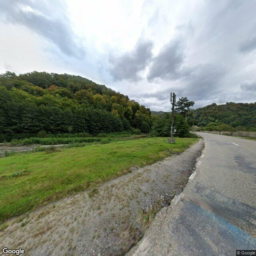

In [ ]:
img = train_features[0].squeeze()
tensor_image = transforms.ToPILImage()(img)
# Display or save the image
tensor_image

In [ ]:
# Using the pre-trained ResNet-50 model
model = torchvision.models.resnet50(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 197MB/s]


In [ ]:
model = nn.DataParallel(model)

model = model.to(device)

In [ ]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop.
for epoch in range(num_epochs):
  model.train()
  for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward propogation
      outputs = model(inputs)
      loss = loss_func(outputs, labels)

      # Backward propogation
      loss.backward()
      optimizer.step()

  # Print the loss for every epoch
  print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

In [ ]:
print(f'Finished Training, Loss: {loss.item():.4f}')